# Predicting English Premier League Soccer Match Winners

Have you ever wondered who will win soccer matches in the English Premier League (EPL)? Has it been hard to find a resource online to answer your questions? Well, you came to the right place. Welcome to the tool that will help you predict the winner of future EPL matches!

## But, how are we going to do this?

We will first begin visualizing and cleaning a dataset used to make the predictions, as shown below. The dataset contains over 1000 matches (each match corresponds to a single row) containing information such as the date/time of the match, the teams that played, and the result of the match.

In [ ]:
# Import pandas library
import pandas as pd

In [ ]:
#Read CSV into DataFrame and display the first five rows
games = pd.read_csv("matches.csv", index_col=0)
games.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


The EPL has 20 teams playing 38 matches per season. The data contains information about the 2020-2021 and 2021-2022 seasons. So we need to make sure our dataset does not contain missing data.

20 teams * 38 matches * 2 seasons = 1520 total games played during 2 seasons, so our dataset should be having information on all these matches.

In [ ]:
# Display the shape of the games
print(games.shape)

(1389, 27)


However, as we can see above, 1389 rows are less than 1520 rows, meaning we are missing data about more matches. We need to account for that missing data.

Note that in the EPL, for each year, 3 teams are demoted from the EPL to the lower league while 3 teams advance from the lower league to the EPL. Thus, we should expect to have 6 teams having less matches than any other team.

In [ ]:
# Number of matches/each team in dataset
games["team"].value_counts()

Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: team, dtype: int64

However, as shown above, 7 teams have less than 70 matches in them (while the other teams have at least 70 matches). From research, Liverpool was not demoted from the seasons. Let's see what's going on with the Liverpool team.

In [ ]:
# Select matches involving "Liverpool" from 'games'
liverpool = games[games["team"] == "Liverpool"]

# Print Liverpool's seasons
print(liverpool["season"])

1     2021
2     2021
4     2021
6     2021
7     2021
9     2021
11    2021
13    2021
14    2021
16    2021
18    2021
20    2021
21    2021
22    2021
23    2021
24    2021
25    2021
27    2021
28    2021
30    2021
31    2021
32    2021
33    2021
34    2021
36    2021
37    2021
38    2021
39    2021
41    2021
42    2021
44    2021
46    2021
47    2021
48    2021
49    2021
50    2021
51    2021
52    2021
Name: season, dtype: int64


It seems we are missing Liverpool data for the 2021-2022 season. We are missing 1 season for Liverpool. However, it is still okay to have just 1 team missing 1 season's worth of data for our dataset, which contains hundreds of matches.

Now let's take a look at how many matches occured per week

In [ ]:
# Count occurrences of each 'round' value
games["round"].value_counts()

Matchweek 1     39
Matchweek 16    39
Matchweek 34    39
Matchweek 32    39
Matchweek 31    39
Matchweek 29    39
Matchweek 28    39
Matchweek 26    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 2     39
Matchweek 19    39
Matchweek 17    39
Matchweek 20    39
Matchweek 15    39
Matchweek 5     39
Matchweek 3     39
Matchweek 13    39
Matchweek 12    39
Matchweek 4     39
Matchweek 11    39
Matchweek 10    39
Matchweek 9     39
Matchweek 8     39
Matchweek 14    39
Matchweek 7     39
Matchweek 6     39
Matchweek 30    37
Matchweek 27    37
Matchweek 22    37
Matchweek 21    37
Matchweek 18    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: round, dtype: int64

Note that since Liverpool data was missing from 1 season, we mostly have 39 matches (1 down from 40). However, after doing research on where the data came from, it seems the data was taken during the middle of the 2021-2022 season, so that is why some weeks have less than 39 matches.

Time to clean the data! We need mostly numeric data to make conclusions in our machine learning models, so let's check for that!

In [ ]:
# Check data types
games.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

It seems some of the columns have an object data type, which our ML model cannot work with. Let's convert them to numeric data types! We can also delete columns like "notes" that do not help our model predict the matches. Let us also make some new predictor columns to supply additional information about each match.

In [ ]:
# Convert the date column to a column of type datetime64[ns] to feed date-time information properly
games["date"] = pd.to_datetime(games["date"])

# Make columns that have numbers corresponding to each type of opponent/venue/day of the week
games['opp_numerical'] = games["opponent"].astype("category").cat.codes
games['venue_numerical'] = games["venue"].astype("category").cat.codes
games["day_numerical"] = games["date"].dt.dayofweek

# Make a column that only keeps the hour of each match
games['hour'] = games['time'].str.split(':').str[0].astype("int")

# Make a column that has a 1 if the match is a win (W) and a 0 of it is a loss (L) or draw (D)
#This is our target column - the result we want to know out of our ML model
games["target"] = (games["result"] == 'W').astype("int")

# Drop appropriate columns from the dataset
games = games.drop(columns=["notes", "comp"])

# Making the ML Model

Now that the data is cleaned, let's make a model. We will use Random Forest to do this since a good chunk of data are classifiers that group the data to a certain bucket/key (like the "target" column). Our data may be nonlinear, and Random Forest is good at modeling nonlinear data too. Moreover, Random Forest is able to handle missing values in the data, which is great in our case, especially with what is going on with the Liverpool data from earlier.

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

In [ ]:
# Create Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=1, min_samples_split=10)

# Make a new dataframe to combine the predictor columns made earlier
preds = ["venue_numerical", "opp_numerical", "hour", "day_numerical"]

# You can only predict the future data with the past data, so we got to split the training/testing data so that this is the case
# That is why we cannot just do the train_test_split function from scikit learn
training_data = games[games["date"] <= '2021-12-31']
testing_data = games[games["date"] > '2021-12-31']

Let us now fit and train the Random Forest model. Our x values are the predictor values while the y values are the target values (who won/lost in the match)

In [ ]:
# Train the model on the training data
model.fit(training_data[preds], training_data["target"])

# Predict target variable for the testing data
pred_target = model.predict(testing_data[preds])

Now, let's see the accuracy of our model using a classification report

In [ ]:
# Print classification report
print(metrics.classification_report(pred_target, testing_data["target"]))

              precision    recall  f1-score   support

           0       0.82      0.65      0.72       220
           1       0.28      0.48      0.36        62

    accuracy                           0.61       282
   macro avg       0.55      0.57      0.54       282
weighted avg       0.70      0.61      0.64       282



Looks like the accuracy of the model is 61% - when we predicted the occurrence of an event (win or loss), that event would actually occur

Now let's see in which places the accuracy is low or high - we will make a confusion matrix to do this

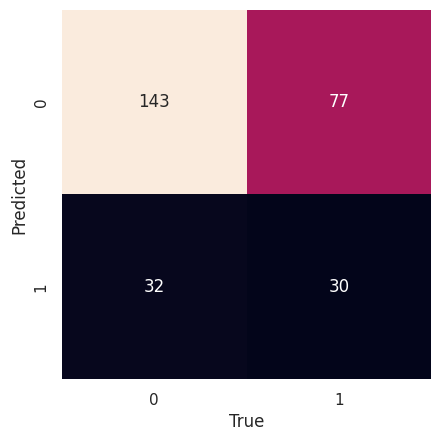

In [ ]:
# Make a joint dataframe to combine testing and correct target data
together = pd.DataFrame(dict(actual=testing_data["target"], prediction=pred_target))

# Make a confusion matrix to plot false positives, false negatives, etc.
c_mat = metrics.confusion_matrix(together["actual"], together["prediction"])
sns.heatmap(c_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True');
plt.ylabel('Predicted');

Let's check the precision score of our model - when we would predict a win, the team would win xx% of the time

In [ ]:
# Calculate precision score
precision_score(testing_data["target"], pred_target)

0.4838709677419355

It seems that our precision is not great - yet; we will increase it soon enough

# Increasing Accuracy of the Model

To do the above, we will find the rolling averages of each team. With rolling averages, we want to predict the target value of a future week based on the target values from past weeks. For instance, we want to predict the week 3 value of Tottenham from their week 1 and 2 target value results.

In [ ]:
# For each team in the data, a new dataframe will be made
team_games = games.groupby("team")

# Function to compute rolling averages of a team
def rolling_averages(team, cols, new_cols):

  # Sort the team match history by date in ascending order
  team = team.sort_values("date")

  # Compute rolling averages of team's columns (don't include the current week/row in the calculations that the avg is being computed for)
  rolling_stats = team[cols].rolling(3, closed='left').mean()

  # Update the new_cols parameter with the rolling averages
  team[new_cols] = rolling_stats

  # Drop the missing values
  team = team.dropna(subset=new_cols)

  return team

Let's do a trial run; let's compute the rolling averages for the Aston Villa Team!

In [ ]:
# Get match history for "Aston Villa" team and sort by date
team = team_games.get_group("Aston Villa").sort_values("date")

# Specify columns and new columns for rolling averages
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = list(map(lambda col: f"{col}_rolling", cols))

# Compute rolling averages for the specified columns
rolling_averages(team, cols, new_cols)

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-18,19:15,Matchweek 5,Sun,Away,W,1.0,0.0,Leicester City,0.6,...,19,1,3.666667,0.666667,16.000000,6.000000,15.366667,0.000000,0.000000,0.000000
7,2020-10-23,20:00,Matchweek 6,Fri,Home,L,0.0,3.0,Leeds United,1.2,...,20,0,3.666667,0.666667,13.333333,6.666667,16.066667,0.333333,0.000000,0.000000
8,2020-11-01,12:00,Matchweek 7,Sun,Home,L,3.0,4.0,Southampton,1.8,...,12,0,2.666667,1.666667,13.333333,6.000000,17.433333,0.333333,0.000000,0.000000
9,2020-11-08,19:15,Matchweek 8,Sun,Away,W,3.0,0.0,Arsenal,1.7,...,19,1,1.333333,2.333333,13.333333,5.333333,17.133333,0.666667,0.333333,0.333333
10,2020-11-21,15:00,Matchweek 9,Sat,Home,L,1.0,2.0,Brighton,1.5,...,15,0,2.000000,2.333333,15.666667,5.666667,15.566667,0.333333,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,2022-03-13,14:00,Matchweek 29,Sun,Away,L,1.0,2.0,West Ham,1.0,...,14,0,3.000000,0.000000,12.666667,7.333333,17.133333,0.666667,0.000000,0.000000
31,2022-03-19,12:30,Matchweek 30,Sat,Home,L,0.0,1.0,Arsenal,0.4,...,12,0,2.666667,0.666667,14.000000,8.000000,16.566667,0.333333,0.000000,0.000000
32,2022-04-02,15:00,Matchweek 31,Sat,Away,L,1.0,2.0,Wolves,2.1,...,15,0,1.333333,1.000000,12.000000,5.333333,17.033333,1.000000,0.000000,0.000000
33,2022-04-09,17:30,Matchweek 32,Sat,Home,L,0.0,4.0,Tottenham,1.6,...,17,0,0.666667,1.666667,11.666667,3.666667,17.100000,1.000000,0.333333,0.333333


Now that we tested the rolling averages function, let's apply that function to all the teams!

In [ ]:
# Apply rolling averages function to each team
rolling_teams = team_games.apply(lambda x: rolling_averages(x, cols, new_cols))

# Display rolling_teams
rolling_teams

date   time         round  day venue result  \
team                                                                           
Arsenal                 6  2020-10-04  14:00   Matchweek 4  Sun  Home      W   
                        7  2020-10-17  17:30   Matchweek 5  Sat  Away      L   
                        9  2020-10-25  19:15   Matchweek 6  Sun  Home      L   
                        11 2020-11-01  16:30   Matchweek 7  Sun  Away      W   
                        13 2020-11-08  19:15   Matchweek 8  Sun  Home      L   
...                               ...    ...           ...  ...   ...    ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Matchweek 29  Sun  Away      W   
                        33 2022-03-18  20:00  Matchweek 30  Fri  Home      L   
                        34 2022-04-02  15:00  Matchweek 31  Sat  Home      W   
                        35 2022-04-08  20:00  Matchweek 32  Fri  Away      L   
                        36 2022-04-24  14:00  Matchweek 34  Sun  Away      L   

                             gf   ga         opponent   xg  ...  hour  target  \
team                                                        ...                 
Arsenal                 6   2.0  1.0    Sheffield Utd  0.4  ...    14       1   
                        7   0.0  1.0  Manchester City  0.9  ...    17       0   
                        9   0.0  1.0   Leicester City  0.9  ...    19       0   
                        11  1.0  0.0   Manchester Utd  1.1  ...    16       1   
                        13  0.0  3.0      Aston Villa  1.5  ...    19       0   
...                         ...  ...              ...  ...  ...   ...     ...   
Wolverhampton Wanderers 32  1.0  0.0          Everton  0.8  ...    14       1   
                        33  2.0  3.0     Leeds United  0.8  ...    20       0   
                        34  2.0  1.0      Aston Villa  1.2  ...    15       1   
                        35  0.0  1.0    Newcastle Utd  0.3  ...    20       0   
                        36  0.0  1.0          Burnley  0.7  ...    14       0   

                            gf_rolling ga_rolling sh_rolling sot_rolling  \
team                                                                       
Arsenal                 6     2.000000   1.333333   7.666667    3.666667   
                        7     1.666667   1.666667   5.333333    3.666667   
                        9     1.000000   1.666667   7.000000    3.666667   
                        11    0.666667   1.000000   9.666667    4.000000   
                        13    0.333333   0.666667   9.666667    2.666667   
...                                ...        ...        ...         ...   
Wolverhampton Wanderers 32    1.333333   1.000000  12.333333    3.666667   
                        33    1.666667   0.666667  12.333333    4.333333   
                        34    2.333333   1.000000  13.000000    5.333333   
                        35    1.666667   1.333333  13.000000    5.000000   
                        36    1.333333   1.666667  10.000000    4.666667   

                           dist_rolling  fk_rolling  pk_rolling  pkatt_rolling  
team                                                                            
Arsenal                 6     14.733333    0.666667    0.000000       0.000000  
                        7     15.766667    0.000000    0.000000       0.000000  
                        9     16.733333    0.666667    0.000000       0.000000  
                        11    16.033333    1.000000    0.000000       0.000000  
                        13    18.033333    1.000000    0.333333       0.333333  
...                                 ...         ...         ...            ...  
Wolverhampton Wanderers 32    19.300000    0.000000    0.000000       0.000000  
                        33    19.600000    0.000000    0.000000       0.000000  
                        34    19.833333    0.000000    0.000000       0.000000  
                        35    18.533333    0.000000    0.0

Drop the team column so that the dataframe looks more readable

In [ ]:
# Drop the "team" level from the index
rolling_teams = rolling_teams.droplevel("team")

# Display rolling_teams
rolling_teams

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.4,...,14,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,...,17,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.9,...,19,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.1,...,16,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,...,19,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,0.8,...,14,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,0.8,...,20,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,1.2,...,15,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,0.3,...,20,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


As you can see in the previous dataframe, the indexes of the rows are out of order or are spaced out. Let's fix that so they are ordered properly.

In [ ]:
# Reset the index to have consecutive integers
rolling_teams.index = range(rolling_teams.shape[0]);

# Display rolling_teams
rolling_teams

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.4,...,14,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,...,17,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.9,...,19,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.1,...,16,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,...,19,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2022-03-13,14:00,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,0.8,...,14,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
1313,2022-03-18,20:00,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,0.8,...,20,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
1314,2022-04-02,15:00,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,1.2,...,15,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
1315,2022-04-08,20:00,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,0.3,...,20,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


# Rerunning the model with our new modified predictors

In [ ]:
# Function to retrain the model
def retrain(data, predictors):
  training_data = data[data["date"] <= '2021-12-31']
  testing_data = data[data["date"] > '2021-12-31']

  # Train the model
  model.fit(training_data[predictors], training_data["target"])

  # Predict target variable for the testing data
  pred_target = model.predict(testing_data[predictors])

  # Create a joint DataFrame for actual and predicted target data
  together = pd.DataFrame(dict(actual=testing_data["target"], prediction=pred_target), index=testing_data.index)

  # Calculate precision score
  score_precision = precision_score(testing_data["target"], pred_target)

  return together, score_precision


Now for the moment of truth, let's check out pur new precision!

In [ ]:
# Check the new precision after retraining
together, precision = retrain(rolling_teams, preds + new_cols)

# Display precision
precision

0.6326530612244898

Our precision has risen quite a lot! We can print out combined to see where our predictions went wrong, but it does not tell us about which team played in each match. Let's fix that!

In [ ]:
# Merge relevant columns from rolling_teams with the together DataFrame
cols_wanted = ["date", "team", "opponent", "result"]
together = together.merge(rolling_teams.loc[:, cols_wanted], left_index=True, right_index=True)

# Display together DataFrame
together

,actual,prediction,date,team,opponent,result
54,0,1,2022-01-01,Arsenal,Manchester City,L
55,0,1,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W
1315,0,1,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L


# Seeing how our code predicted the match results for home and away teams

Our code predicted results for both home and away teams, but it is possible that our code said that for a match with the home vs away team, both the home and away teams would have won (when predicting for both sides of the match).

Also, some of the names have not been consistent during all matches. For example, in the dataframe shown above, Wolverhampton Wanderers was the home team in rows 1312 to 1316, but in row 56, that same team is also known as the Wolves in the away team. We need to make the names of the teams consistent across the data.

In [ ]:
# Dictionary for team name translation
team_naming = {"West Ham United": "West Ham",
               "Manchester United": "Manchester Utd",
               "Wolverhampton Wanderers": "Wolves",
               "Newcastle United": "Newcastle Utd",
               "Brighton and Hove Albion": "Brighton",
               "Tottenham Hotspur": "Tottenham"}

# Class for missing key handling
class CompleteDictTeam(dict):
    def __missing__(self, key):
        return key

# Updated map to create the team_dict dictionary
team_dict = CompleteDictTeam(team_naming)

Apply the new mapping of team names into the dataframe. Also merge the predictions for the home and away teams together.

In [ ]:
# Map team names using the team_map dictionary
together["new_team"] = together["team"].map(team_dict)

# Merge together DataFrame with itself based on date and new_team-opponent match
df_merge = together.merge(together, left_on=["date", "new_team"], right_on=["date", "opponent"])

Here, we see what happened when the model predicted team_x would win and team_y would lose.

In [ ]:
# Condition for the specified predictions
condition = (df_merge["prediction_x"] == 1) & (df_merge["prediction_y"] == 0)

# Count the occurrences of actual outcomes that match the condition
df_merge[condition]["actual_x"].value_counts()


1    26
0    12
Name: actual_x, dtype: int64

Here, our precision was 26/40 = 65%. Our precision by analyzing both the home & away teams and running the Random Forest + Rolling Averages model has risen compared to just running only the same model last time.

Now, let's see what our final merged dataframe with the Random Forest + Rolling Averages model predictions looks like:

In [ ]:
# Display the merged DataFrame
df_merge

,actual_x,prediction_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,prediction_y,team_y,opponent_y,result_y,new_team_y
0,0,1,2022-01-01,Arsenal,Manchester City,L,Arsenal,1,0,Manchester City,Arsenal,W,Manchester City
1,0,1,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
2,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
3,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
4,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,0,0,Everton,Wolves,L,Everton
264,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,1,0,Leeds United,Wolves,W,Leeds United
265,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,0,0,Aston Villa,Wolves,L,Aston Villa
266,0,1,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,1,0,Newcastle United,Wolves,W,Newcastle Utd
